<h1>this assigment is comprised of the parts named as first,second and third assigments.</h1>

<h1>First part of assignment</h1>

In [1]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<strong>BeautifulSoup library is used for getting table data in html and I removed the "Not assigned" in Borough columns if exists</strong>

In [2]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find_all('table')
df = pd.read_html(str(table))[0]

df = df[df.Borough != 'Not assigned']

In [3]:
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [4]:
print(df.shape)

(103, 3)


<h1>Second part of assignment</h1>

<strong>the csv files is used for the data of latitude and longitude</strong>

In [5]:
dfGeo=df_data_1.copy()
dfGeo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<strong>the values of longitude and latitude are merged with the table neighbourhood</strong>

In [6]:
#listOfGeo=dfGeo["Postal Code"].to_list()
df["Latitude"]=0
df["Longitude"]=0
for item in dfGeo["Postal Code"]:
    data=dfGeo[dfGeo["Postal Code"]==item]
    df.loc[df['Postal Code'] == item,['Latitude']]=data["Latitude"].values[0]
    df.loc[df['Postal Code'] == item,['Longitude']]=data["Longitude"].values[0]
    

  

In [7]:
df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


<h1>Part 3 of the assignment</h1>

In [8]:
from sklearn.cluster import KMeans 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium
%matplotlib inline 


In [9]:
from geopy.geocoders import Nominatim

<strong>obtain the latitude and longitude values via geocode</strong>

In [10]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


<h3>show the neighbourhoods on the map</h3>

In [11]:

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<strong>the Borough values which contain "Toronto" are used</strong>

In [12]:
torontoDataframe=df[df["Borough"].str.contains("Toronto")].reset_index(drop=True)
torontoDataframe.head()


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


<strong>the info for using foursquare API</strong>

In [13]:
CLIENT_ID = '1ZRVG3SNGE24M51YROR4BAZQCNDBGHBOLSMLV4MJ2SRNTJMO' # your Foursquare ID
CLIENT_SECRET = 'P1I5450KIXFMQRLP1V0YJDBF3QXPFWXVI3RO12E3ZW2DYZME' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius=50
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1ZRVG3SNGE24M51YROR4BAZQCNDBGHBOLSMLV4MJ2SRNTJMO
CLIENT_SECRET:P1I5450KIXFMQRLP1V0YJDBF3QXPFWXVI3RO12E3ZW2DYZME


In [14]:
torontoDataframe.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

<strong>the function for getting cayegory type of venue</strong>

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<strong>the function for getting the values of the nearby venues</strong>

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h3>we get the json file to get the properties of neighbourhood such as venue venu category</h3>

In [17]:
toronto_venues = getNearbyVenues(names=torontoDataframe['Neighbourhood'],
                                   latitudes=torontoDataframe['Latitude'],
                                   longitudes=torontoDataframe['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [18]:
print(toronto_venues.shape)
toronto_venues.head()

(1613, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


<strong> printing out the venues and venue category by grouping the items in neighbourhood</strong>

In [19]:
venueCount=toronto_venues.groupby('Neighbourhood').count()
venueCount[["Venue","Venue Category"]].head()

,Venue,Venue Category
Neighbourhood,,
Berczy Park,59,59
"Brockton, Parkdale Village, Exhibition Place",22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15
Central Bay Street,62,62


In [20]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


<h3> getting the cluster values that I want to to use in the kmeans algorithm</h3>

In [21]:
print(toronto_venues['Venue Category'].unique()[0:5])

tobeClustered=["Coffee Shop","Pub","Mediterranean Restaurant","Shopping Mall"]

['Bakery' 'Coffee Shop' 'Distribution Center' 'Breakfast Spot' 'Spa']


<strong>For the classification, the dataframe converted into a table containing the data 1 and 0 to show whether the venue category exist in the neighbourhood</strong>

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_to_be_clustred=toronto_onehot[["Neighbourhood","Coffee Shop","Pub","Mediterranean Restaurant","Shopping Mall"]]
print(toronto_to_be_clustred.shape)
toronto_to_be_clustred.head(3)


(1613, 5)


,Neighbourhood,Coffee Shop,Pub,Mediterranean Restaurant,Shopping Mall
0,"Regent Park, Harbourfront",0,0,0,0
1,"Regent Park, Harbourfront",1,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0


In [23]:
toronto_to_be_clustred.shape

(1613, 5)

<h3>By getting the means, we can check the similarities among the neighbourhoods</h3>

In [24]:
toronto_grouped = toronto_to_be_clustred.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Coffee Shop,Pub,Mediterranean Restaurant,Shopping Mall
0,Berczy Park,0.101695,0.016949,0.0,0.016949
1,"Brockton, Parkdale Village, Exhibition Place",0.090909,0.000000,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.0,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.066667,0.000000,0.0,0.000000
4,Central Bay Street,0.193548,0.000000,0.0,0.000000


In [25]:
toronto_grouped.shape

(39, 5)

<h3>the first grapph the shows the accuarcy based on the value of k </h3>

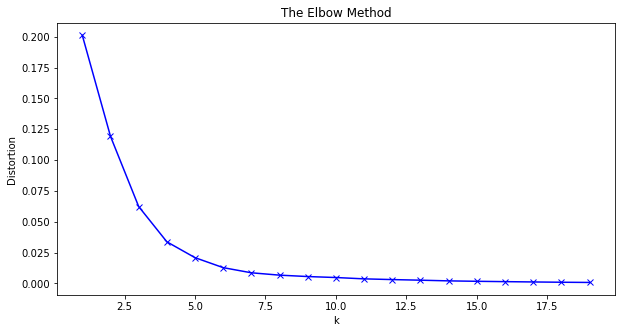

In [26]:
distortions = []
toronto_grouped_clustering_for_bestK = toronto_grouped.drop('Neighbourhood', 1)
K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 1000)
    kmean.fit(toronto_grouped_clustering_for_bestK)
    distortions.append(kmean.inertia_)


plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()


<strong> I used a KElbowVisualizer function to find the best K value for kmeans clustering
The function link as :https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
</strong>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


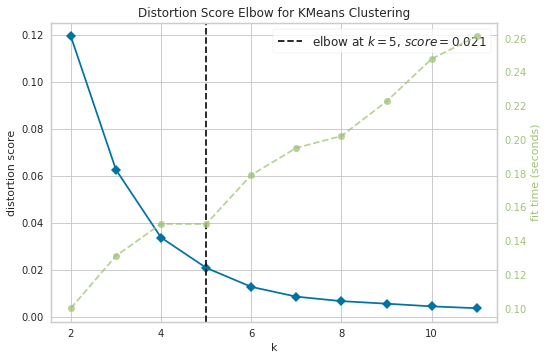

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
kmean = KMeans(n_clusters=k, random_state=42, n_init = 50, max_iter = 1000)
#kmean.fit(toronto_grouped_clustering_for_bestK)


visualizer = KElbowVisualizer(kmean, k=(2,12))

visualizer.fit(toronto_grouped_clustering_for_bestK)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [28]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 4, 1, 0, 1, 1, 2, 1, 4], dtype=int32)

In [29]:

toronto_grouped.insert(0, 'Cluster_Labels', kmeans.labels_)
toronto_merged = torontoDataframe

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged1 = toronto_merged.join(toronto_grouped.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged1.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,Coffee Shop,Pub,Mediterranean Restaurant,Shopping Mall
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,0.166667,0.0625,0.0,0.00
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,0.233333,0.0000,0.0,0.00
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,0.110000,0.0000,0.0,0.01
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,0.064103,0.0000,0.0,0.00
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,0.000000,0.2500,0.0,0.00


In [30]:
toronto_merged1["Cluster_Labels"].value_counts()

1    15
2    11
4    10
0     2
3     1
Name: Cluster_Labels, dtype: int64

<h3>showing the neighbourhoods basod the kmeans clustering</h3>

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
#theZeorLabel=toronto_merged1.loc[toronto_merged1['Cluster_Labels'] == 0, toronto_merged1.columns[[1] + list(range(1, toronto_merged1.shape[1]))]]
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged1['Latitude'], toronto_merged1['Longitude'], toronto_merged1['Neighbourhood'], toronto_merged1['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Analyzing the cluster labeled as 0</h3>

In [32]:
toronto_merged1.loc[toronto_merged1['Cluster_Labels'] == 0, toronto_merged1.columns[[1] + list(range(1, toronto_merged1.shape[1]))]]

,Borough,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,Coffee Shop,Pub,Mediterranean Restaurant,Shopping Mall
1,Downtown Toronto,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,0.233333,0.0,0.0,0.0
6,Downtown Toronto,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,0.193548,0.0,0.0,0.0
